In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore



**Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable**

In [54]:
data1 = pd.read_csv("/workspaces/GreatLearning/Unsupervised/Project/Car name.csv")

In [55]:
data1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [56]:
data1.shape

(398, 1)

**Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.**

In [57]:
data2 = pd.read_json("/workspaces/GreatLearning/Unsupervised/Project/Car-Attributes.json")

In [58]:
data2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [59]:
data2.shape

(398, 8)

**Part 1.1 c - Merge both the DataFrames together to form a single DataFrame**

In [60]:
data = pd.merge(data1, data2, left_index=True, right_index=True)


In [61]:
data.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [62]:
data.shape

(398, 9)

**Part 1.1 d - Print 5 point summary of the numerical features and share insights.**

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [64]:
data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**Insights from 5 points summary**

Totally we have 7 numerical columns , lets see one by one

**1.mpg**

total records = 398,

min value = 9,

mean value = 23,

sd value = 7.8,

max value = 46.6,

25 th percentile = 17.5,

50 th percentile = 23,

75 th percentile = 29

**2.cyl**

total records = 398,

min value = 3,

mean value = 5.4,

sd value = 1.7,

max value = 8,

25 th percentile = 4,

50 th percentile = 4,

75 th percentile = 8

**3.disp**

total records = 398,

min value = 68,

mean value = 193,

sd value = 104,

max value = 455,

25 th percentile = 104,

50 th percentile = 148,

75 th percentile = 262
 
**4.wt**

total records = 398,

min value = 1613,

mean value = 2970,

sd value = 846,

max value = 5140,

25 th percentile = 2223,

50 th percentile = 2803,

75 th percentile = 3608

**5.acc**

total records = 398,

min value = 8,

mean value = 15,

sd value = 2,

max value = 24,

25 th percentile = 13,

50 th percentile = 15,

75 th percentile = 17

**6.yr**

total records = 398,

min value = 70,

mean value = 76,

sd value = 3,

max value = 82,

25 th percentile = 73,

50 th percentile = 76,

75 th percentile = 79


**7.origin**

total records = 398,

min value = 1,

mean value = 1.5,

sd value = 0.8,

max value = 3,

25 th percentile = 1,

50 th percentile = 1,

75 th percentile = 2

**Part 1.2 a - Check and print feature-wise percentage of
missing values present in the data and impute with the
best suitable approach.**

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [66]:
data.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

**There is not null values but we can check for any mistaken/wrong values which can be replaced/imputed**

**Column with wrong data types(compared with data description)**
1. hp - object here - need to be changes to float



In [67]:
data["hp"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [68]:
data["hp"] = data["hp"].replace("?", pd.NaT)

In [69]:
data["hp"] = pd.to_numeric(data["hp"], errors='coerce')

In [70]:
data["hp"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [71]:
print("NULL %")
data.isnull().sum()/len(data)

NULL %


car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          0.015075
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [72]:
data["hp"].fillna(data["hp"].mean(), inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


**Part 1.2 b - Check for duplicate values in the data and
impute with the best suitable approach.**

In [74]:
data.duplicated().sum()

0

**I don't see any duplicate records in data**

**Part 1.2 c - Plot a pairplot for all features.**

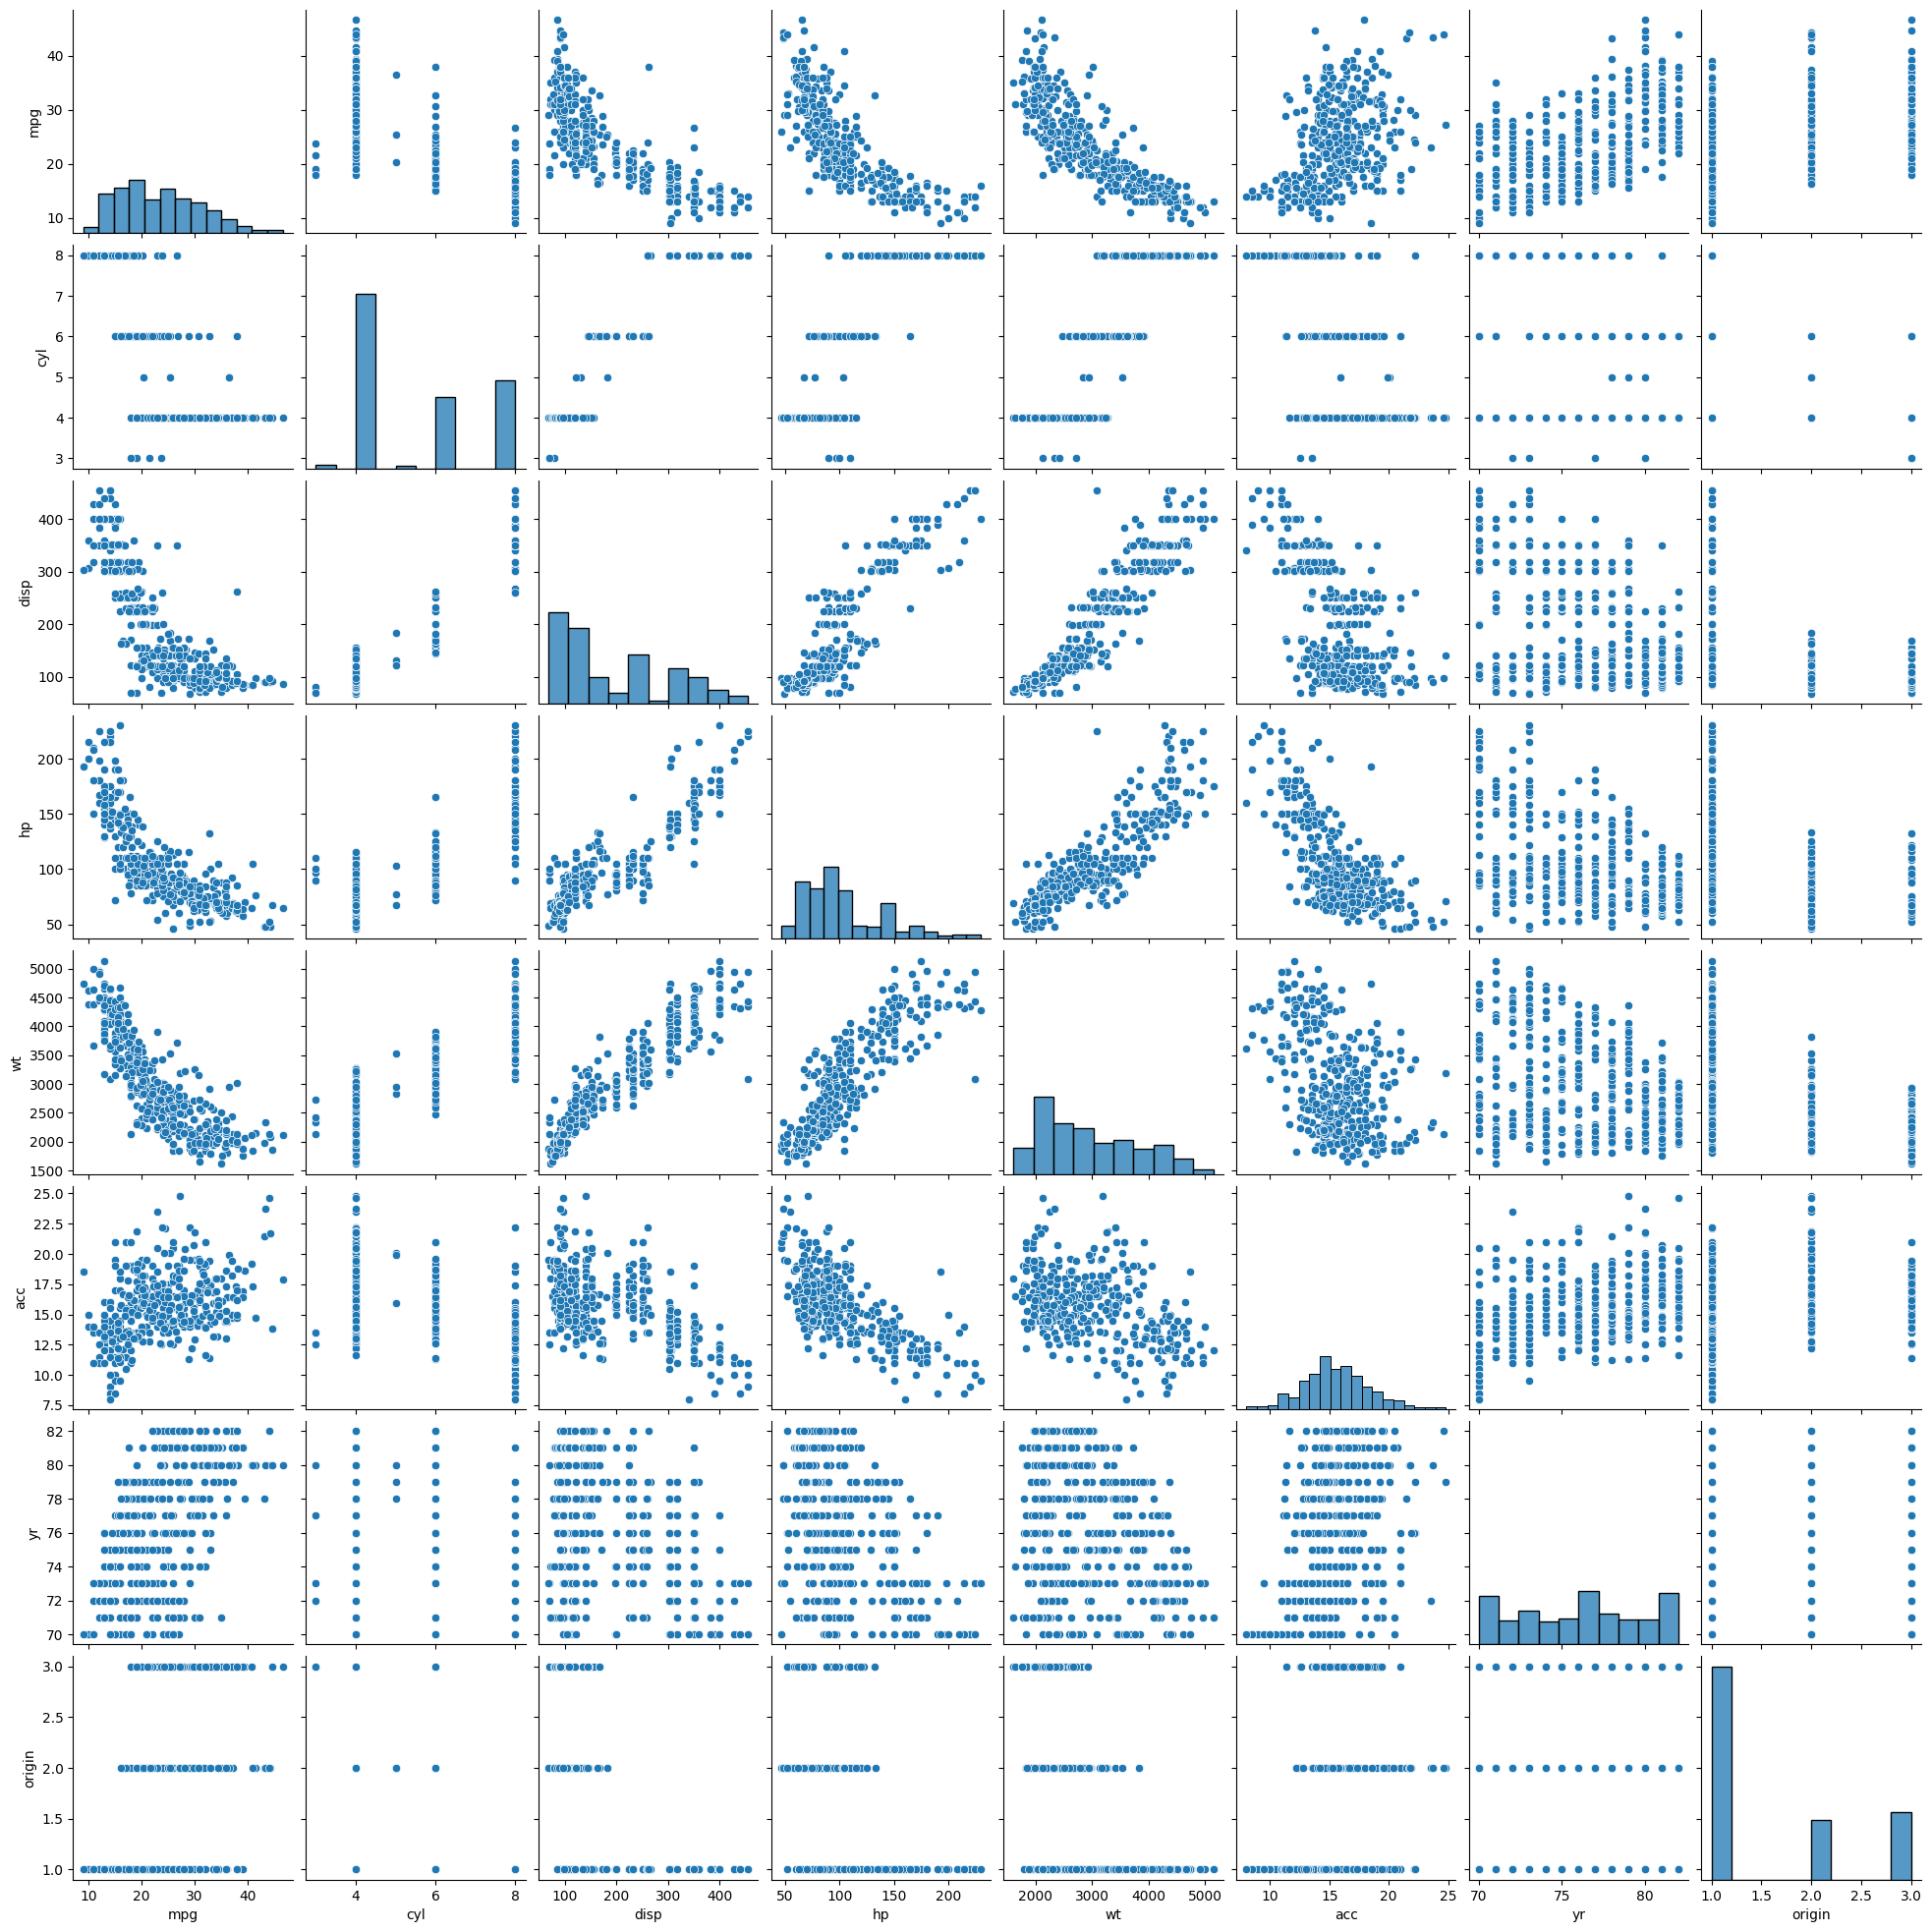

In [75]:
sns.pairplot(data)

**Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’.
Datapoints should be distinguishable by ‘cyl’.**

<Axes: xlabel='wt', ylabel='disp'>

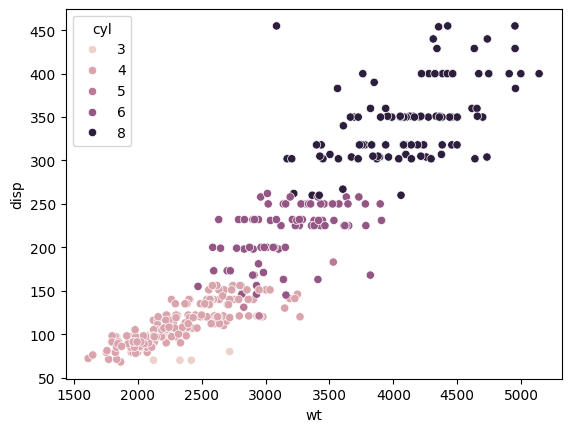

In [76]:
sns.scatterplot(data=data, x='wt', y='disp', hue='cyl')

**Part 1.2 e - Share insights for Q2.d.**

While comparing wt and disp feature
- both are seems to be postively correlated , when weight increases , displacement also increases and vice versa

While comparing wt and disp feature and distinguish by cylinders
- each cylinder form distinct clusters in the data - we have 5 clusters of data
- all three are postively correlated, when cylinders increases both weight and displacement also increased and vice versa



**Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’.
Datapoints should be distinguishable by ‘cyl’**

<Axes: xlabel='wt', ylabel='mpg'>

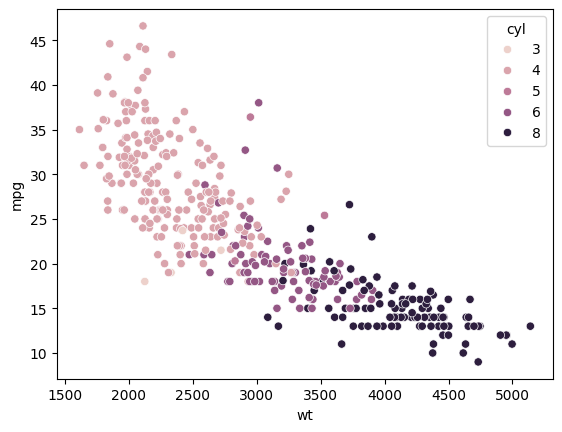

In [77]:
sns.scatterplot(data=data, x='wt', y='mpg', hue='cyl')

**Part 1.2 g- Share insights for Q2.f.**

While comparing wt and mpg feature
- both are seems to be negatively correlated , when weight increases , miles per gallon also decreases and vice versa

While comparing wt and mpg feature and distinguish by cylinders
- each cylinder form distinct clusters in the data -  we have 5 clusters of data

- all three are negatively correlated, when cylinders increases both weight and miles per gallon also decreases and vice versa


**Part 1.2 h - Check for unexpected values in all the
features and datapoints with such values.**

In [78]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("------------------------------")


car_name
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'd

**I don't see any unexpected values in any features because, I have cleaned Hp columns (replaces "?" with mean ) in Part 1.2a when replaceing nul values (you can refer that)**

**Part 1.3 a - Apply K-Means clustering for 2 to 10
clusters.**

In [79]:
datascaled=data.iloc[:,1:]
datascaled=datascaled.apply(zscore)

In [80]:
datascaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145


In [81]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(datascaled)
    prediction=model.predict(datascaled)
    meanDistortions.append(sum(np.min(cdist(datascaled, model.cluster_centers_, 'euclidean'), axis=1)) / datascaled.shape[0])


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

**Part 1.3 b - Plot a visual and find elbow point.**

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

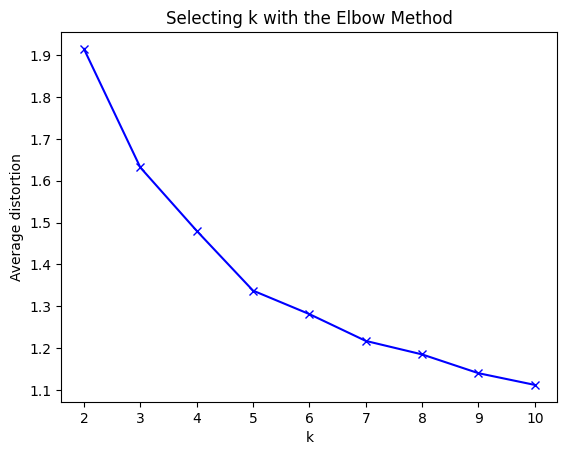

In [82]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**From the visual ,elbow point seems to be 5** 

**Part 1.3 c - On the above visual, highlight which are
the possible Elbow points.**

**The possible elbow points will be 5 and 7**         

**Part 1.3 d - Train a K-means clustering model once
again on the optimal number of clusters.**

In [83]:
k_means = KMeans(n_clusters = 5)
k_means.fit(datascaled)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [84]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 2, 4, 3, 4,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 0, 2, 0, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 4, 3, 3, 0, 0, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 3,
       4, 2, 2, 2, 2, 3, 4, 4, 0, 3, 1, 3, 3, 2, 1, 1, 1, 1, 4, 0, 4, 0,
       4, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 0, 4, 0, 0, 0, 4, 3, 3,
       3, 3, 4, 0, 4, 4, 4, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 0, 4, 4, 0, 3, 0, 0, 4, 3, 2, 3, 2, 4, 4, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 4, 4, 0, 0, 0, 2, 0, 2,

**Part 1.3 e - Add a new feature in the DataFrame which
will have labels based upon cluster value**

In [85]:
prediction=k_means.predict(datascaled)

data["GROUP"] = prediction
datascaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [86]:
data.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,0
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,4
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,0
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,0
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1,0


**Part 1.3 f -Plot a visual and color the datapoints based
upon clusters.**

In [87]:
dataClust = data.select_dtypes(include='number').groupby(['GROUP'])
dataClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,28.791045,4.194030,132.567164,83.193116,2563.805970,16.549254,79.671642,1.074627
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
2,19.104938,6.222222,233.444444,102.018141,3298.580247,16.632099,75.703704,1.037037
3,24.619048,4.047619,108.601190,85.803207,2347.619048,16.107143,73.309524,2.107143
4,34.137500,4.083333,99.527778,73.179705,2155.819444,16.734722,79.416667,2.763889


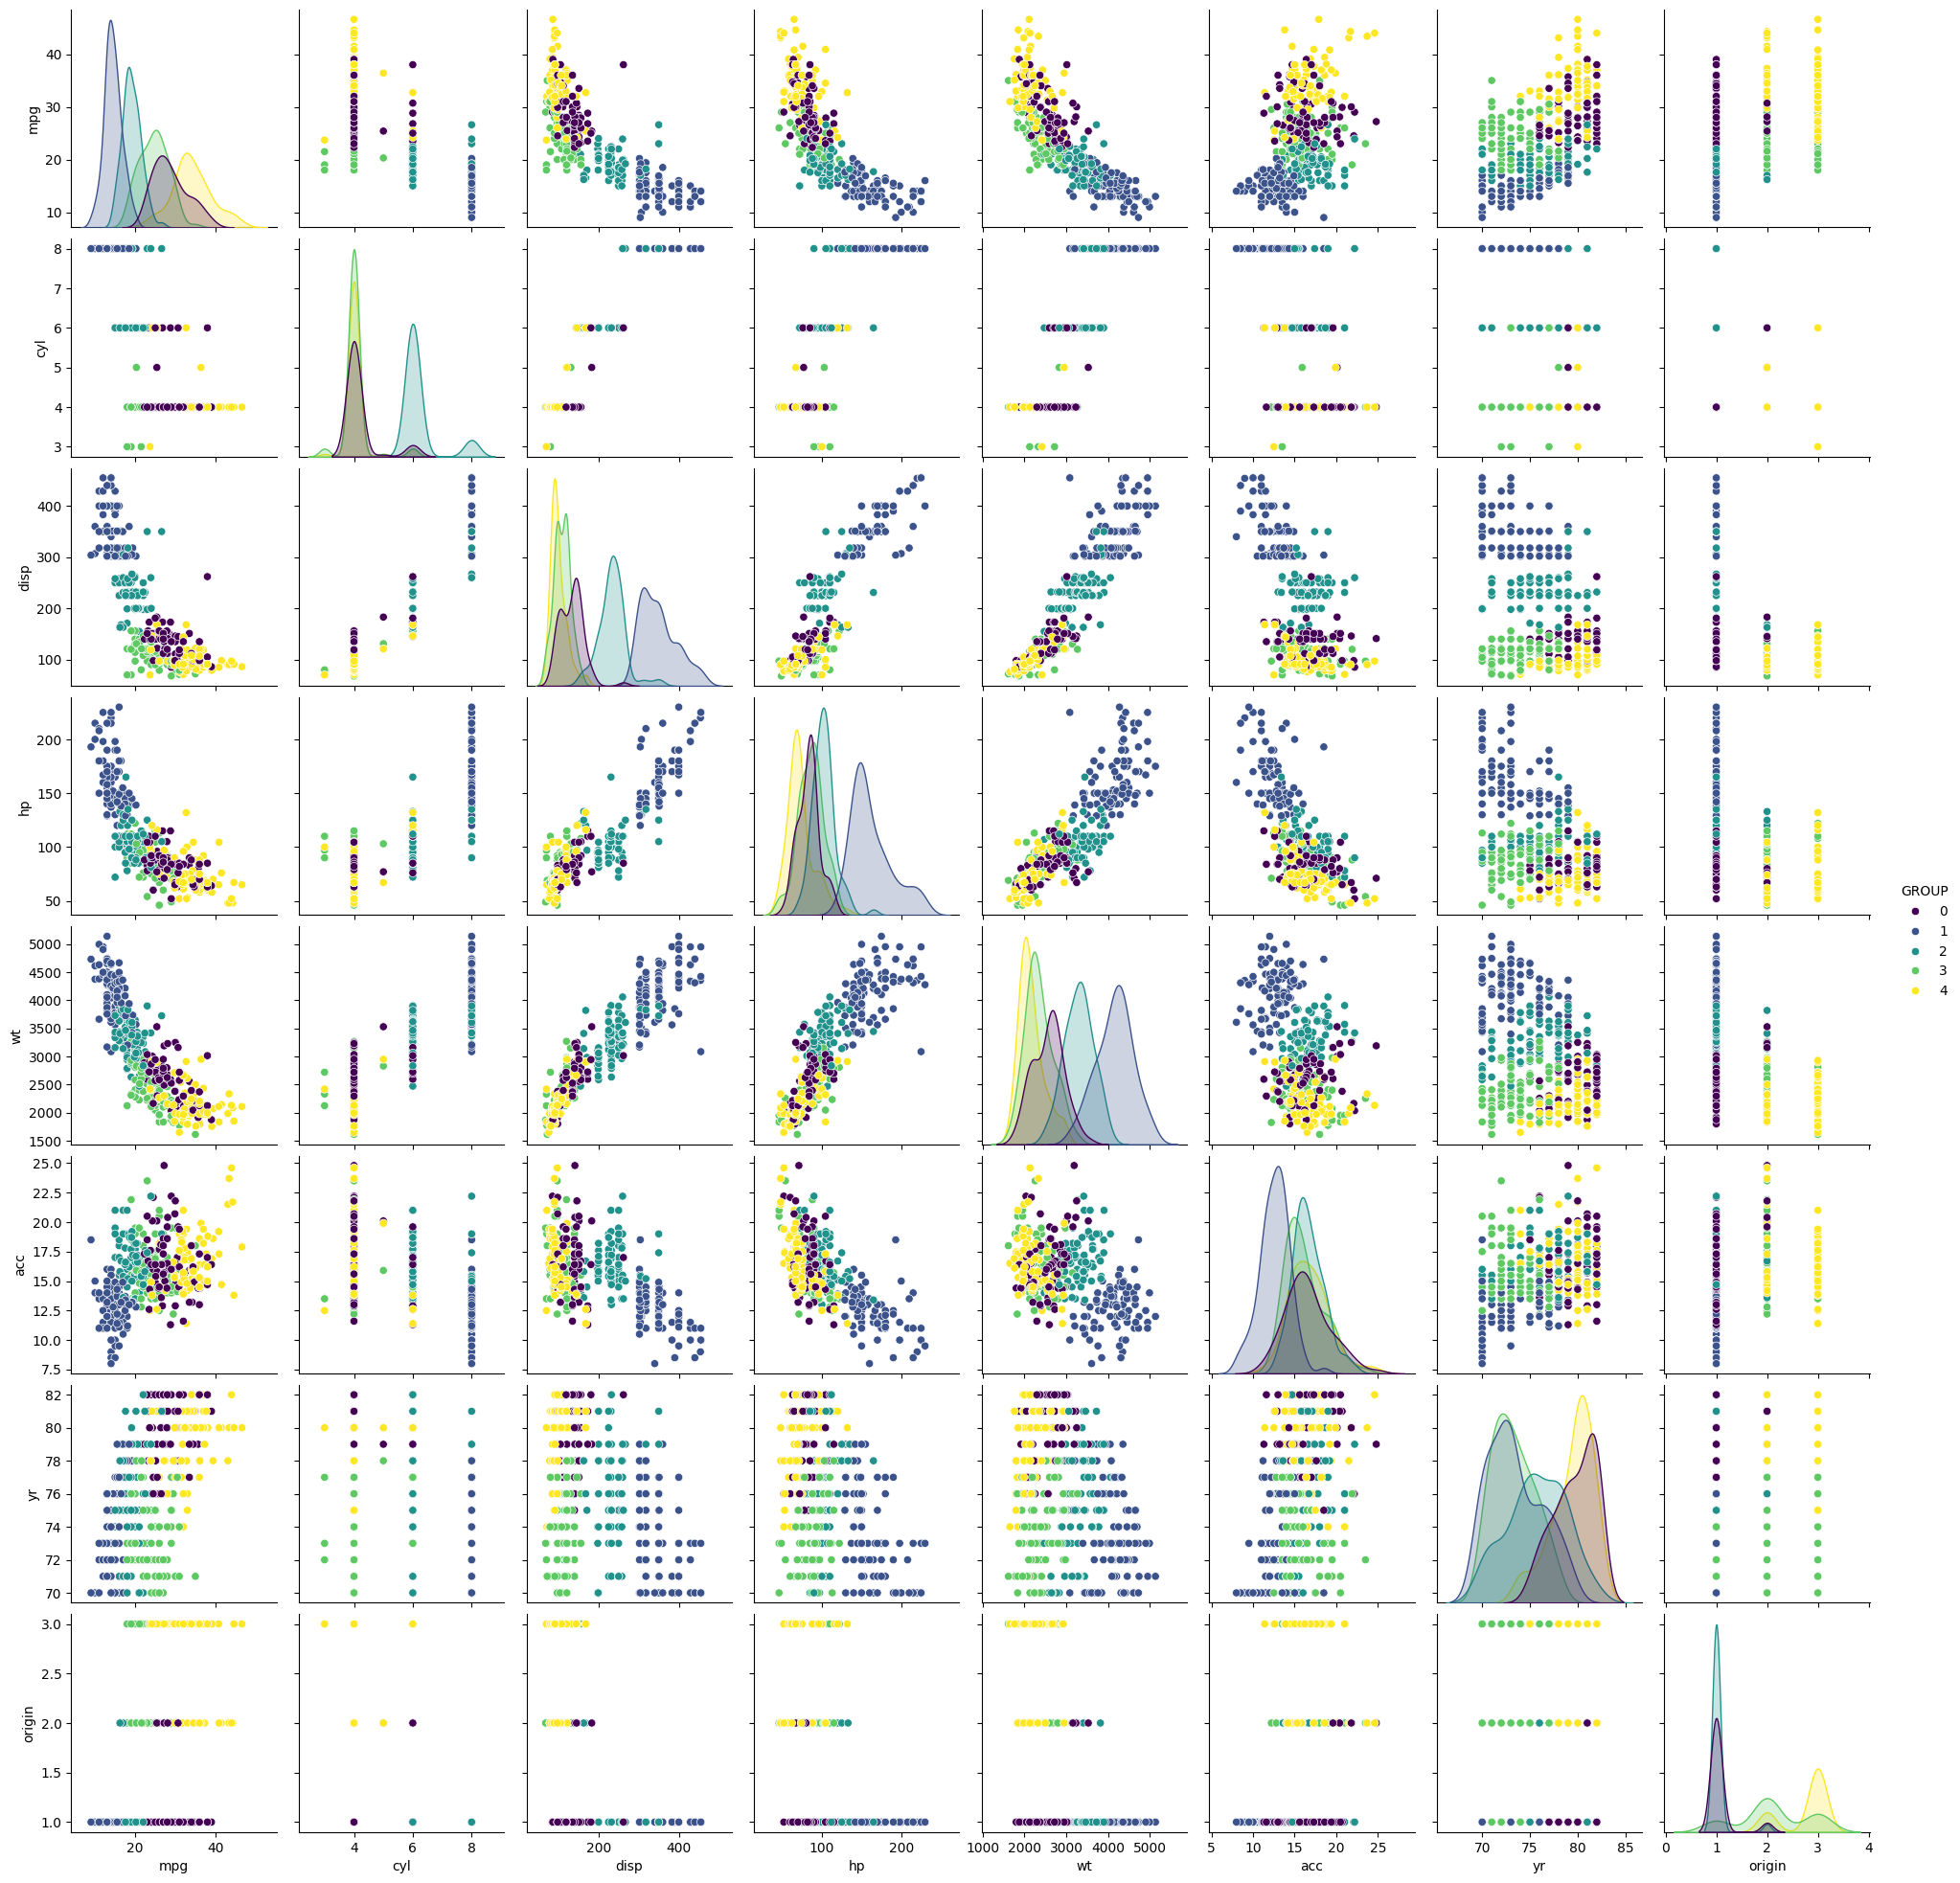

In [88]:
sns.pairplot(data, hue='GROUP',palette='viridis')

**Part 1.3 g - Pass a new DataPoint and predict which
cluster it belongs to.**

In [89]:
# new_data_point = pd.DataFrame([[24.6,4,108,85,2347,16,73,2.1]])
# new_data_point = pd.DataFrame([[29,4,132,83,256,16,79,1]])
new_data_point = pd.DataFrame([[34,4,99,73,2155,16,79,2.7]])


new_data_point

,0,1,2,3,4,5,6,7
0,34,4,99,73,2155,16,79,2.7


In [90]:
scaler = StandardScaler()
scaler.fit(data.iloc[:,1:-1])
new_data_point_scaled = scaler.transform(new_data_point)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [91]:
new_data_point_scaled

array([[ 1.34322489, -0.85632057, -0.90673133, -0.8248604 , -0.96411276,
         0.15681724,  0.80963097,  1.40707872]])

In [92]:
predicted_cluster = k_means.predict(new_data_point_scaled)
print("Predicted Cluster is : " ,predicted_cluster[0])

Predicted Cluster is :  4


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**Part 2. 1 a - Read ‘vehicle.csv’ and save as
DataFrame.**

In [93]:
data2 = pd.read_csv("/workspaces/GreatLearning/Unsupervised/Project/vehicle.csv")

In [94]:
data2.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


**Part 2.1 b- Check percentage of missing values and
impute with correct approach.**

In [95]:
print("Percentage of NULL values before imputation")
data2.isnull().sum()/len(data2)*100

Percentage of NULL values before imputation


compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [96]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [97]:
for column in data2.select_dtypes(include='number'):
    median_value = data2[column].median()
    data2[column].fillna(median_value, inplace=True)

In [98]:
print("Percentage of NULL values after imputation")
data2.isnull().sum()/len(data2)*100

Percentage of NULL values after imputation


compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

All null values are imputed with median since all those are numerical , we can use median for both normal and skewed distribution

**Part 2.1 c- Visualize a Pie-chart and print percentage
of values for variable ‘class’.**

Text(0.5, 1.0, 'Distribution of Classes')

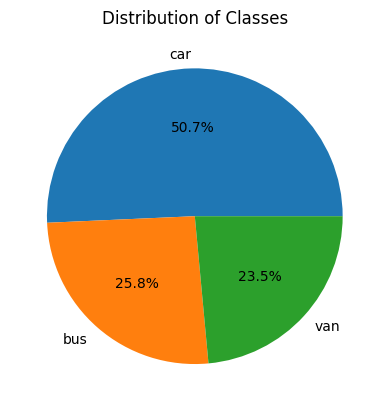

In [102]:
class_counts = data2['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Classes')


**Part 2.1 d - Check for duplicate rows in the data and
impute with correct approach.**

In [105]:
data2.duplicated().sum()

0

This dataset has 0 duplicates, so we need to drop or impute anything

**Part 2.2 a - Split data into X and Y.**

In [112]:
X = data2.iloc[:,:-1]
Y = data2.iloc[:,-1]

In [113]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [114]:
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

**Part 2.2 b - Standardize the Data.**

In [119]:
X_scaled = X.apply(zscore)


In [121]:
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


**Part 2.3 a - Train a base Classification model using
SVM.**

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=1)

In [124]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

**Part 2.3 b - Print Classification metrics for train data.**

In [125]:
print("\nTrain Score (SVM base model):")
print(clf.score(X_train, y_train))

print("Train Performance Matrix:")
predicted_labels_test = clf.predict(X_train)
metrics.classification_report(y_train, predicted_labels_test).split("\n")


Train Score (SVM base model):
0.9792899408284024
Train Performance Matrix:


['              precision    recall  f1-score   support',
 '',
 '         bus       0.99      0.98      0.98       181',
 '         car       0.99      0.99      0.99       339',
 '         van       0.95      0.97      0.96       156',
 '',
 '    accuracy                           0.98       676',
 '   macro avg       0.98      0.98      0.98       676',
 'weighted avg       0.98      0.98      0.98       676',
 '']

**Part 2.3 c - Apply PCA on the data with 10
components.**

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

**Part 2.3 d - Visualize Cumulative Variance Explained
with Number of Components.**

In [129]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [131]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


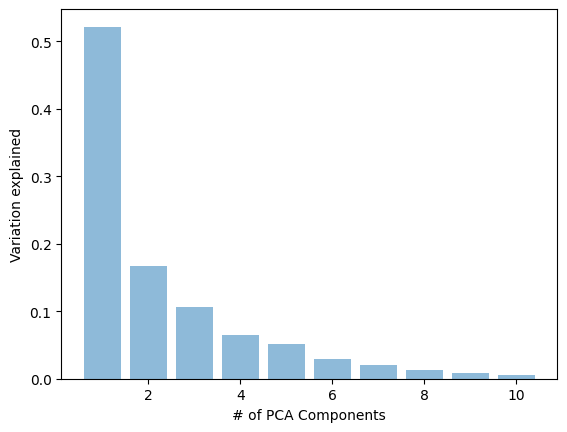

In [133]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('# of PCA Components')
plt.show()


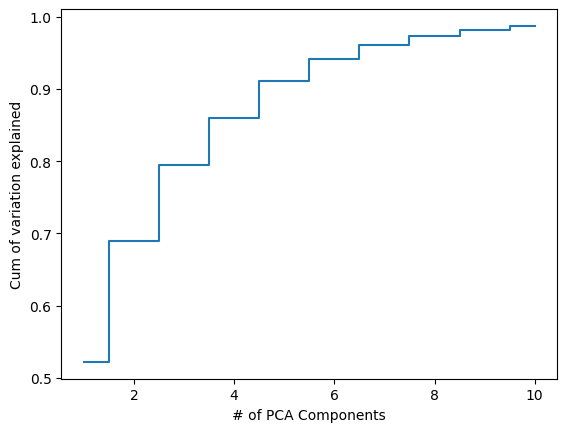

In [143]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()

**Part 2.3 e - Draw a horizontal line on the above plot to
highlight the threshold of 90%.**

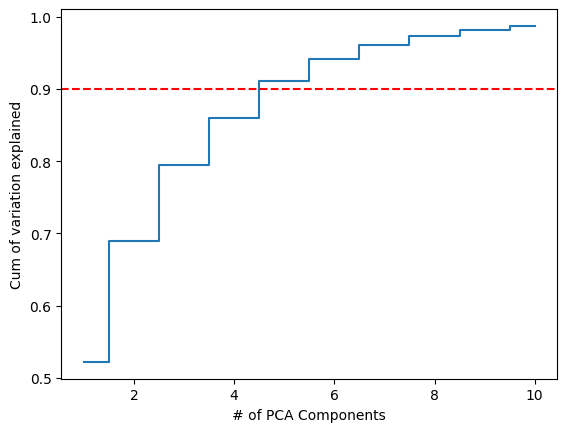

In [144]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')
plt.show()


**Part 2.3 f - Apply PCA on the data. This time Select
Minimum Components with 90% or above variance
explained.**

Using 5 components as explain more than 90 % of variance

In [145]:
pca3 = PCA(n_components=5)
pca3.fit(X_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
X_scaled_pca = pca3.transform(X_scaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205466e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641988e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592036e-03  3.95242742e-02]
 [ 7.83843562e-02  1.87337409e-01 -7.12008426e-02 -4.26053417e-02
   3.27257120e-02  3.14147277e-02 -9.

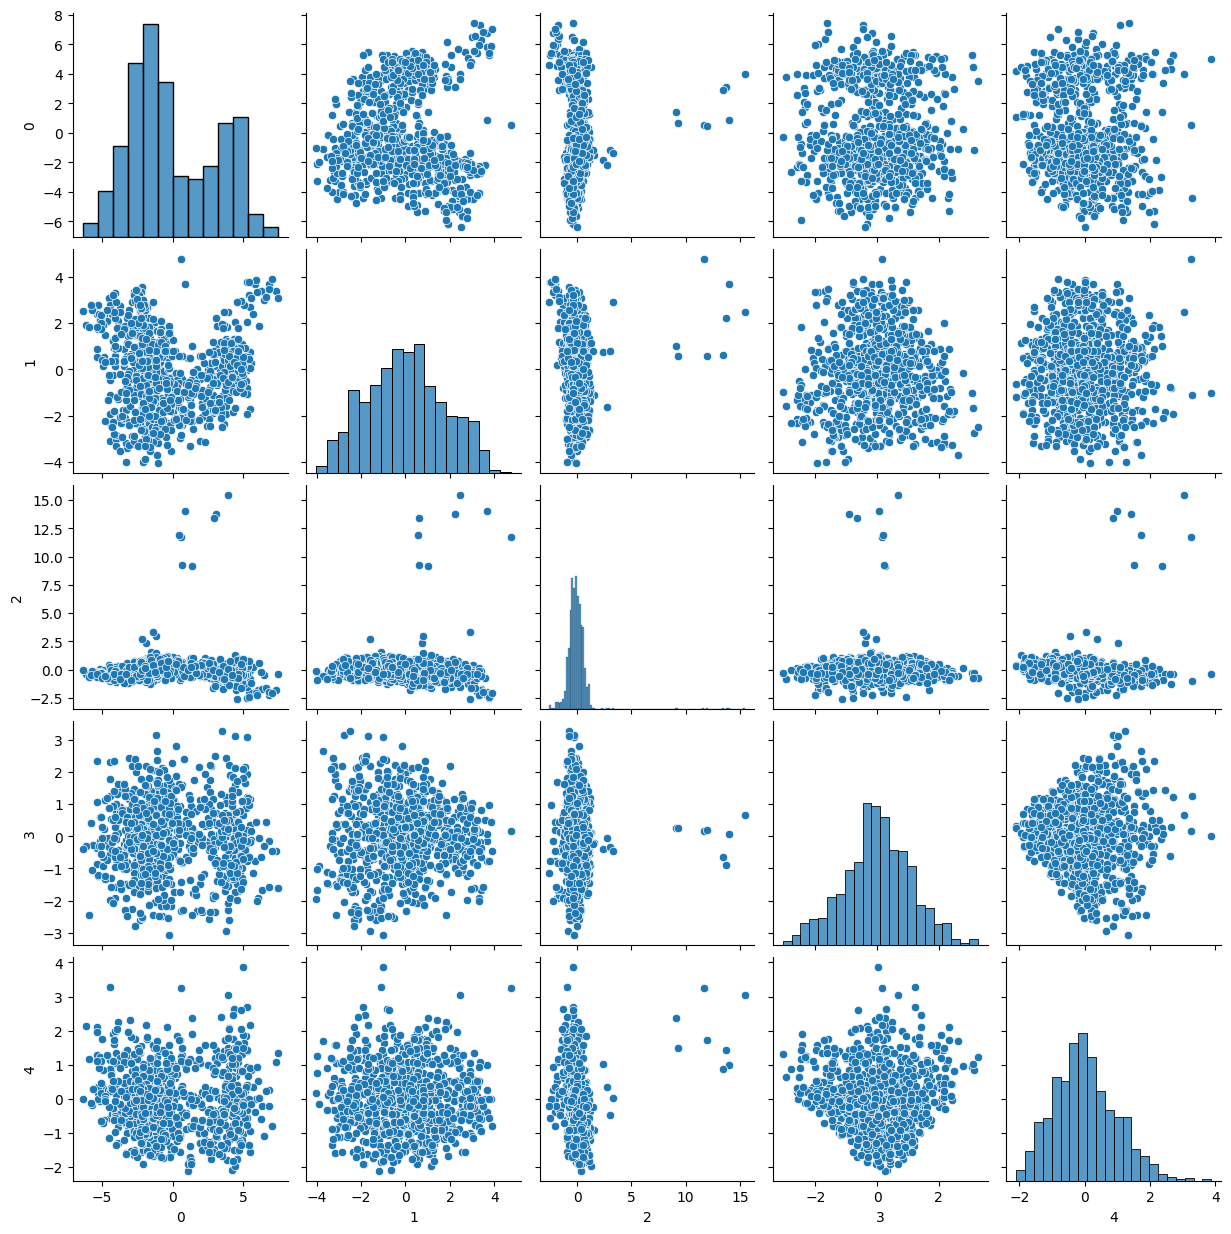

In [146]:
sns.pairplot(pd.DataFrame(X_scaled_pca))

**Part 2.3 g - Train SVM model on components selected
from above step.**

In [149]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled_pca, Y, test_size=0.20, random_state=1)

In [150]:
clf_pca = svm.SVC(gamma=0.025, C=3)
clf_pca.fit(X_train_pca , y_train_pca)

SVC(C=3, gamma=0.025)

**Part 2.3 h - Print Classification metrics for train data of
above model and share insights.**

In [151]:
print("\nTrain Score (SVM PCA model):")
print(clf_pca.score(X_train_pca, y_train_pca))

print("Train Performance Matrix - PCA:")
predicted_labels_test_pca = clf_pca.predict(X_train_pca)
metrics.classification_report(y_train_pca, predicted_labels_test_pca).split("\n")


Train Score (SVM PCA model):
0.7795857988165681
Train Performance Matrix - PCA:


['              precision    recall  f1-score   support',
 '',
 '         bus       0.73      0.72      0.72       181',
 '         car       0.86      0.86      0.86       339',
 '         van       0.66      0.67      0.67       156',
 '',
 '    accuracy                           0.78       676',
 '   macro avg       0.75      0.75      0.75       676',
 'weighted avg       0.78      0.78      0.78       676',
 '']

**Share Insights**

Here PCA model is compared with base model

**Score**  = 0.77 (decreased from 0.97) - overcomed the overfitting and normalised here

let's see class by class

**class 1 - bus :**

precision - 0.73 (decreased from 0.99) 
recall - 0.72 (decreased from 0.98)
f1 score - 0.72 (decreased from 0.98)


**class 2 - car :** 

precision - 0.86 (decreased from 0.99)
recall - 0.86 (decreased from 0.99)
f1 score - 0.86 (decreased from 0.99)

**class 3 - van :**

precision - 0.66 (decreased from 0.95) 
recall - 0.67 (decreased from 0.97)
f1 score - 0.67 (decreased from 0.96)


**Overall, model overcomed the overfitting while compared with base model**




**Part 2.4 a - Train another SVM on the components out
of PCA. Tune the parameters to improve performance.**

In [152]:
parameter = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

SVM_h = GridSearchCV(svm.SVC(), parameter, verbose = 1)
SVM_h.fit(X_train_pca , y_train_pca)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [153]:
SVM_h.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [154]:
# SVM Final Model
svm_final = svm.SVC(C=10, gamma=0.1, kernel='rbf')
svm_final.fit(X_train_pca , y_train_pca)

SVC(C=10, gamma=0.1)

**Part 2.4 b- Share best Parameters observed from
above step.**

**The best paramter is** -  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

**Part 2.4 c- Print Classification metrics for train data of
above model and share relative improvement in
performance in all the models along with insights.**

In [155]:
print("\nTrain Score (SVM PCA HP model):")
print(svm_final.score(X_train_pca, y_train_pca))

print("Train Performance Matrix - PCA HP:")
predicted_labels_test_pca_hp = svm_final.predict(X_train_pca)
metrics.classification_report(y_train_pca, predicted_labels_test_pca_hp).split("\n")


Train Score (SVM PCA HP model):
0.8831360946745562
Train Performance Matrix - PCA HP:


['              precision    recall  f1-score   support',
 '',
 '         bus       0.88      0.86      0.87       181',
 '         car       0.91      0.93      0.92       339',
 '         van       0.83      0.81      0.82       156',
 '',
 '    accuracy                           0.88       676',
 '   macro avg       0.87      0.87      0.87       676',
 'weighted avg       0.88      0.88      0.88       676',
 '']

**Comparison of hp pca with pca model and base model**

Score = 0.88 (improved from 0.73) - pca model  - improved by using best hp params
Score = 0.88 (decreased from 0.97) - base model - overcomed overfitting

Lets do class by class

**class 1 - bus** 

(comparison with pca model)

precision - 0.88 (improved from 0.73)
recall - 0.86 (improved from 0.72)
f1-score - 0.87 (improved from 0.72)

(comparison with base  model)

precision - 0.88 (decreased from 0.99)
recall - 0.86 (decreased from 0.98)
f1-score - 0.87 (decreased from 0.98)

**class 2 - car** 

(comparison with pca model)

precision - 0.91 (improved from 0.86)
recall - 0.93 (improved from 0.86)
f1-score - 0.92 (improved from 0.86)

(comparison with base  model)

precision - 0.91 (ecreased from 0.99)
recall - 0.93 (decreased from 0.99)
f1-score - 0.92 (decreased from 0.00)

**class 3 - van** 

(comparison with pca model)

precision - 0.83 (improved from 0.66)
recall - 0.81 (improved from 0.67)
f1-score - 0.82 (improved from 0.67)

(comparison with base  model)

precision - 0.83 (decreased from 0.95)
recall - 0.81 (decreased from 0.97)
f1-score - 0.82 (decreased from 0.96)

**Overall** : 
After builing PCA after base model, PCA model overcomed the overfitting and genralised and model

Afer builing PCA HP with best parameter, this improves the model performace and improved the metrics





**Part 2.5 a - Explain pre-requisite/assumptions of PCA.**

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that finds the directions (principal components) in which the data varies the most

Prerequisites/Assumptions of PCA:

**Linearity**
PCA assumes, relationship of variables are in linear fashion, if it is non-linear some other approach migh tb used

**Normality**
PCA assumes the data is normally distributed, if it is not normal distrtibuted , this might affect the performace of pca

**Part 2.5 b - Explain advantages and limitations of PCA.**

**Advantages**

1.Dimensionality Reduction - it reduces dimension ino principla components especially used for high dimensional dataset

2.Feature Extraction - it extracts features/ patterns by extracting principal components from the dataset

3.Collinearity Reduction - it reduces multicollinearity by transforming orginal features to orthogonal features

4.Noise Reduction - this can also help you in reducing noise in your dataset

5.Visualization - we can easy visualise lower dimensional data


**Disadvantages**
1.Linearity Assumption - it assumes data relationship is linear

2.Loss of Interpretability - principal components don;t have clear interpretable meaning

3.Orthogonality Constraint - principal components will be selected with high variance but if the important direction of the data may don't have high variance

4.Scale Sensitivity - is sensitive to the scale of the data variables

5.Outliers Sensitivity - is sensitive to the outliers that can influence the variance of the data

